In [1]:
from bs4 import BeautifulSoup as bs
import requests
import re
from splinter import Browser
import pandas as pd
import itertools

In [2]:
#Define Executable Path for ChromeDriver to use for web scraping

executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Define base endpoint URL. Other url's will be built off this endpoint.

baseball_reference_main = 'https://www.baseball-reference.com'
nats_roster_endpoint = '/teams/WSN/2021-roster.shtml'
nats_roster_page = baseball_reference_main + nats_roster_endpoint
browser.visit(nats_roster_page)

<html class="js cookies localstorage sessionstorage cors history csspositionsticky no-touchevents pointerevents matchmedia flexwrap desktop is_live" data-root="/home/br/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en" style=""><head><script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.js" type="text/javascript"></script><script defer="" src="https://tagan.adlightning.com/freestar/bl-7b120a5-5b31429b.js" type="text/javascript"></script><script defer="" src="https://tagan.adlightning.com/freestar/b-7b120a5-b3bdc5bb.js" type="text/javascript"></script><script type="text/javascript"></script>
<script async="" src="//c.amazon-adsystem.com/aax2/apstag.js"></script><script src="//js-sec.indexww.com/ht/p/184310-82987131453484.js"></script><script src="https://freestar-io.videoplayerhub.com/gallery.js"></script><script src="https://pghub.io/js/pandg-sdk.js"></script><meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-co
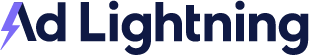

In [4]:
#Use Beautiful Soup HTML.parser to extract relvant details about news articles

roster_html = browser.html
roster_soup = bs(roster_html, 'html.parser')
roster_soup

In [5]:
# Extract 40 man roster

active_40_man_html = roster_soup.find('table', class_="sortable stats_table now_sortable", id="the40man").find('tbody').find_all(attrs={"data-stat": "player"})
active_40_man_html

[<td class="left" csk="Baldonado,Alberto" data-append-csv="redirect.fcgi?player=1&amp;mlb_ID=593604" data-stat="player"><strong><a href="/redirect.fcgi?player=1&amp;mlb_ID=593604">Alberto Baldonado</a></strong></td>,
 <td class="left" csk="Finnegan,Kyle" data-append-csv="redirect.fcgi?player=1&amp;mlb_ID=640448" data-stat="player"><strong><a href="/redirect.fcgi?player=1&amp;mlb_ID=640448">Kyle Finnegan</a></strong></td>,
 <td class="left" csk="Gray,Josiah" data-append-csv="redirect.fcgi?player=1&amp;mlb_ID=680686" data-stat="player"><strong><a href="/redirect.fcgi?player=1&amp;mlb_ID=680686">Josiah Gray</a></strong></td>,
 <td class="left" csk="Rogers,Josh" data-append-csv="redirect.fcgi?player=1&amp;mlb_ID=642028" data-stat="player"><strong><a href="/redirect.fcgi?player=1&amp;mlb_ID=642028">Josh Rogers</a></strong></td>,
 <td class="left" csk="Thompson,Mason" data-append-csv="redirect.fcgi?player=1&amp;mlb_ID=666168" data-stat="player"><strong><a href="/redirect.fcgi?player=1&amp;ml

<html class="js cookies localstorage sessionstorage cors history csspositionsticky no-touchevents pointerevents matchmedia flexwrap desktop is_live" data-root="/home/br/build" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en" style=""><head><script async="" src="https://static.criteo.net/js/ld/publishertag.prebid.js" type="text/javascript"></script><script defer="" src="https://tagan.adlightning.com/freestar/bl-7b120a5-5b31429b.js" type="text/javascript"></script><script defer="" src="https://tagan.adlightning.com/freestar/b-7b120a5-b3bdc5bb.js" type="text/javascript"></script><script type="text/javascript"></script>
<script src="https://www.googletagservices.com/activeview/js/current/osd.js"></script><script src="https://partner.googleadservices.com/gampad/cookie.js?domain=www.baseball-reference.com&amp;callback=_gfp_s_&amp;client=ca-pub-5319453360923253&amp;cookie=ID%3D6bd5ad29e8670a86%3AT%3D1630894712%3AS%3DALNI_MaV_PT2ivy5r3AeX-Z0FhJpeUKWVQ"></scri
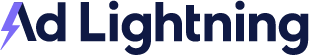

[['Alberto Baldonado', 1]]

In [6]:
active_40_man_list = []
for player in active_40_man_html[0]:
    player_info = []
    player_info.append(player.text)
    player_info.append(1)
    player_endpoint = player.a['href']
    player_url = baseball_reference_main + player_endpoint
    browser.visit(player_url)
    player_html = browser.html
    player_soup = bs(player_html, 'html.parser')
    #element_test = 
    browser.find_by_id("meta_more_button").first.click()
    print(player_soup)
    active_40_man_list.append(player_info)
    
active_40_man_list

In [ ]:
all_nats_players_this_season_html = roster_soup.find('table', class_="sortable stats_table shade_zero now_sortable", id="appearances").find('tbody').find_all(attrs={"data-stat": "player"})

In [ ]:
non_40_man_players_list = []
non_40_nats_org = []
non_40_other = []

for player in all_nats_players_this_season_html:
    if player.text not in active_40_man_list:
        non_40_man_players_list.append(player.text)
        player_profile_endpoint = player.a["href"]
        player_profile_url = baseball_reference_main + player_profile_endpoint
        print(player_profile_url)
        browser.visit(player_profile_url)
        profile_html = browser.html
        profile_soup = bs(profile_html, 'html.parser')
        try:
            team_string_header = profile_soup.find('div',class_='players').find(attrs={"itemtype":"https://schema.org/Person"}).find(string='Team:')
            team_parent = team_string_header.find_parent('p').a.text
            print(team_parent)
            if team_parent == 'Washington Nationals':
                non_40_nats_org.append(player.text)
            else:
                non_40_other.append(player.text)
        except AttributeError:
            print('Free Agent or Released')
            non_40_other.append(player.text)

In [ ]:
print(non_40_other)
print(non_40_nats_org)